In [13]:
# Task 1: Load and Explore the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset
try:
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ File not found. Please check the dataset path.")
except Exception as e:
    print("❌ Error loading dataset:", e)

# Display first few rows
print("🔹 First 5 rows of the dataset:")
display(df.head())

✅ Dataset loaded successfully!

🔹 First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Explore dataset structure
print("\n🔹 Dataset info:")
print(df.info())

print("\n🔹 Missing values per column:")
print(df.isnull().sum())


🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

🔹 Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
# Clean dataset to check if there were missing values
df = df.dropna()

In [5]:
# Task 2: Basic Data Analysis
print("\n🔹 Descriptive statistics:")
print(df.describe())


🔹 Descriptive statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
# Grouping by species
print("\n🔹 Average values per species:")
species_group = df.groupby("target").mean()
print(species_group)


🔹 Average values per species:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  


In [7]:
# Replace numeric target with species names for readability
df["species"] = df["target"].map({i: name for i, name in enumerate(iris_data.target_names)})

print("\n🔹 Average petal length by species:")
print(df.groupby("species")["petal length (cm)"].mean())


🔹 Average petal length by species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64


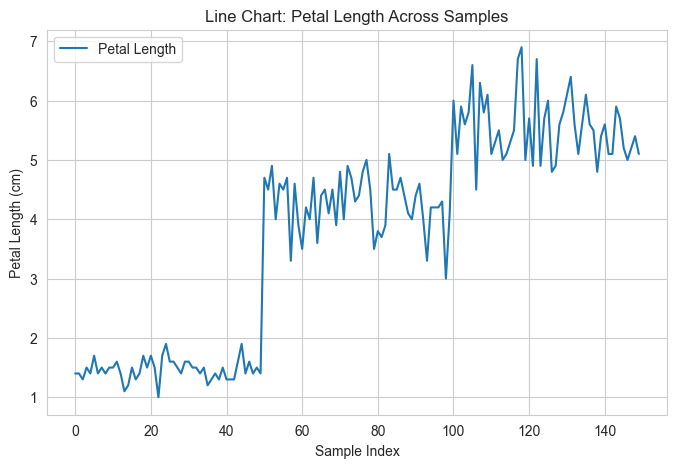

In [8]:
# Task 3: Data Visualization
sns.set_style("whitegrid")

# 1. Line chart - simulate as if petal length varies across samples
plt.figure(figsize=(8,5))
plt.plot(df.index, df["petal length (cm)"], label="Petal Length")
plt.title("Line Chart: Petal Length Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

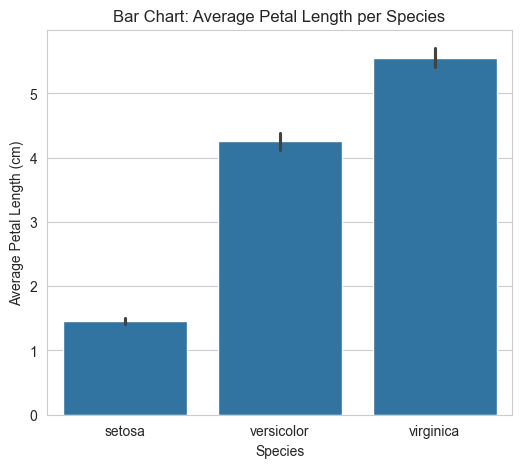

In [9]:
# 2. Bar chart - average petal length per species
plt.figure(figsize=(6,5))
sns.barplot(x="species", y="petal length (cm)", data=df, estimator="mean")
plt.title("Bar Chart: Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

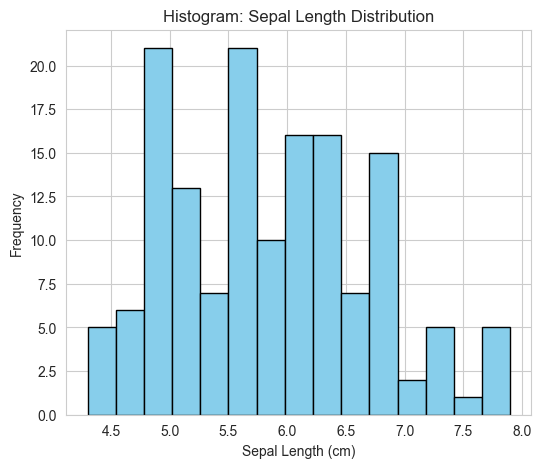

In [10]:
# 3. Histogram - distribution of sepal length
plt.figure(figsize=(6,5))
plt.hist(df["sepal length (cm)"], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram: Sepal Length Distribution")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

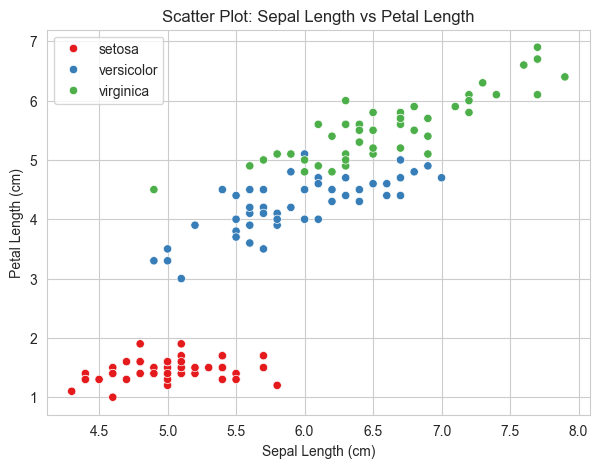

In [11]:
# 4. Scatter plot - sepal length vs petal length
plt.figure(figsize=(7,5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, palette="Set1")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

In [12]:
# Findings / Observations
print("\n📌 Findings:")
print("- The Iris dataset has no missing values and contains 150 samples with 4 numerical features.")
print("- Average petal length differs clearly among species (Setosa < Versicolor < Virginica).")
print("- Sepal length is normally distributed around ~5.8 cm.")
print("- Scatter plot shows Setosa is clearly separable from other species using petal length/width.")


📌 Findings:
- The Iris dataset has no missing values and contains 150 samples with 4 numerical features.
- Average petal length differs clearly among species (Setosa < Versicolor < Virginica).
- Sepal length is normally distributed around ~5.8 cm.
- Scatter plot shows Setosa is clearly separable from other species using petal length/width.
